In [1]:
from fractions import Fraction as Frac
from matplotlib import pyplot as plot
from sympy import Symbol, log, exp, solve

from LocUtil import Grid1

In [2]:
nPlot = 101

In [3]:
x = Symbol('x')
z = Symbol('z')

## Shift

In [4]:
shift = Symbol('shift')

In [5]:
phi = log(x/(1-x)) - shift
inv = exp(z - shift) / (1 + exp(z - shift))

molX = x

In [6]:
phi0 = phi.subs(shift,0)
molShift = molX.subs(x,inv).subs(z,phi0).simplify()
molShift

x/(x - (x - 1)*exp(shift))

In [7]:
shiftL = tuple(range(-3,4))
shiftL

(-3, -2, -1, 0, 1, 2, 3)

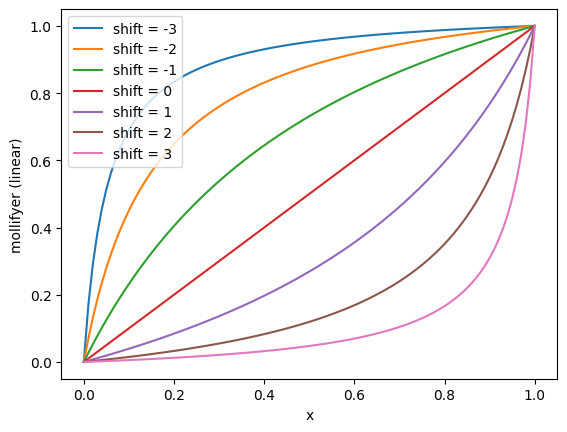

In [14]:
xL = Grid1(0,1,nPlot)

for s in shiftL:
	yL = [molShift.subs({shift:s, x:xV}).evalf() for xV in xL]
	plot.plot(xL,yL, label=f'shift = {s}')

plot.xlabel('x')
plot.ylabel('mollifyer (linear)')
plot.legend()

## Scale

In [9]:
scale = Symbol('scale')

In [10]:
mapY = log(x / (1 - x)) / scale
invY = exp(scale*z) / (1 + exp(scale*z))

In [11]:
scaleL = [Frac(1,4),Frac(1,2),1,2,4]
scaleL

[Fraction(1, 4), Fraction(1, 2), 1, 2, 4]


Mz(z) = My(inv(z, scale)), but when My(y) = y, this is just inv(z, scale)

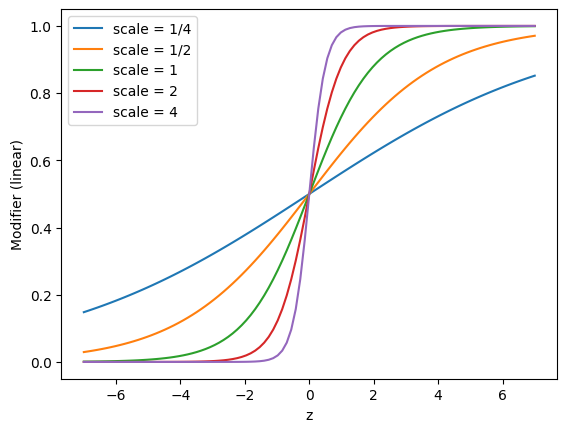

In [15]:
zL = Grid1(-7,7, nPlot)

for s in scaleL:
	mol = [invY.subs({z: zV, scale: s}).evalf() for zV in zL]
	plot.plot(zL,mol, label=f'scale = {s}')

plot.xlabel('z')
plot.ylabel('Modifier (linear)')
plot.legend()

In [ ]:
for s in scaleL:
	xL = [inv.subs({z: zV, scale: s}).evalf() for zV in zL]
	mol = [inv.subs({z: zV, scale: 1}).evalf() for zV in zL]
	plot.plot(xL,mol, label=f'scale = {s}')

plot.xlabel('x')
plot.ylabel('Modifier (linear)')
plot.legend()

### formula for modifier

In [16]:
invX = exp(z) / (1 + exp(z))
invX

exp(z)/(exp(z) + 1)

In [19]:
temp = invX.subs({z: mapY})
temp.simplify()

exp(log(-x/(x - 1))/scale)/(exp(log(-x/(x - 1))/scale) + 1)

Doesnt simplify, because the log might be on different "cycles" of the Remain Surface

In [20]:
temp1 = (exp(1/scale) * x/(1-x)) / (exp(1/scale) * x/(1-x) + 1)
temp1

x*exp(1/scale)/((1 - x)*(x*exp(1/scale)/(1 - x) + 1))

In [21]:
temp1.simplify()

x*exp(1/scale)/(x*exp(1/scale) - x + 1)

## comparison of shift and scale 

In [22]:
kscale = Symbol('kScale')
kshift = Symbol('kShift')

In [24]:
molShift = (x * kscale) / ((kscale - 1)*x + 1)
molShift

kScale*x/(x*(kScale - 1) + 1)

In [25]:
molShift = x / ((1 - kshift)*x + kshift)
molShift

x/(kShift + x*(1 - kShift))